In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor

ABOUT THE DATASET The dataset is related with hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India.Using Data Science skills to investigate the factors that really affect the cost, and to gain some very interesting insights that might help to choose what to eat and from where. As there are two different file of data set(train and test) then will be doing following steps on train file:- EDA(Summary Statistics and Visualizations),Data Cleaning, Feature Enginnering(using label encoder),splitting the data(train test split), Model selection and training, Model Evaluation,Model validation, Hyperparameter tuning and Deloyment. Where as in case of test dataset will only be performing EDA(Summary Statistics and Visualizations),Data Cleaning, Feature Enginnering(using label encoder).

In [2]:
excel_file_path = '/Users/ashwanisindhu/Downloads/Data_Test.xlsx'
test_df= pd.read_excel(excel_file_path)

In [3]:
test_df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


The test dataframe has 4231 rows and 8 columns. 
ABOUT THE VARIABLES

The datset is divided into two major variable input n output variables.The attribute of input and output variables are as follow"- 1 TITLE	 2 RESTAURANT_ID	 3 CUISINES	 4 TIME	 5 CITY 6 LOCALITY 7 RATING	 8 VOTES 

Checking the dataset by applying various functions as mentioned below:- i head() ii tail iii shape( which shows the no. of rows n columns) iv data types(here we can see whether my data is numerical or categorical)

There are two type of file as follow: 1.train.csv : This file contains all the details related to restaurant food cost as well as the target variable “cost”.
2.test.csv : Use the trained model to predict the cost of a two person meal.

In [4]:
excel_file_path = '/Users/ashwanisindhu/Downloads/Data_Train.xlsx'
train_df= pd.read_excel(excel_file_path)

In [5]:
train_df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


The test dataframe has 12690 rows and 9 columns. 
ABOUT THE VARIABLES

The datset is divided into two major variable input n output variables.The attribute of input and output variables are as follow"- 1 TITLE	 2 RESTAURANT_ID	 3 CUISINES	 4 TIME	 5 CITY 6 LOCALITY 7 RATING	 8 VOTES 9 COST

Checking the dataset by applying various functions as mentioned below:- i head() ii tail iii shape( which shows the no. of rows n columns) iv data types(here we can see whether my data is numerical or categorical)

There are two type of file as follow: 1.train.csv : This file contains all the details related to restaurant food cost as well as the target variable “cost”.
2.test.csv : Use the trained model to predict the cost of a two person meal.


In [6]:
 df1=train_df.drop(['RESTAURANT_ID'], axis=1)              #dropping Restaurant_ID column

In [7]:
df1

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [8]:
 test=test_df.drop(['RESTAURANT_ID'], axis=1)                #dropping Restaurant_ID column

In [9]:
test.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [10]:
df1.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [11]:
df1.tail()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [12]:
df1.shape

(12690, 8)

In [13]:
test.shape

(4231, 7)

In [14]:
df1.dtypes

TITLE       object
CUISINES    object
TIME        object
CITY        object
LOCALITY    object
RATING      object
VOTES       object
COST         int64
dtype: object

It is observed that both numerical and categroical data is present in th dataset.


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     12690 non-null  object
 1   CUISINES  12690 non-null  object
 2   TIME      12690 non-null  object
 3   CITY      12578 non-null  object
 4   LOCALITY  12592 non-null  object
 5   RATING    12688 non-null  object
 6   VOTES     11486 non-null  object
 7   COST      12690 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 793.3+ KB


With the help of above function we can get the detailed information about the data like Range index,Colunm name, non-null count, data type and memory usage.

In [16]:
test.dtypes           #observed that both numerical and categroical data is present in th dataset.

TITLE       object
CUISINES    object
TIME        object
CITY        object
LOCALITY    object
RATING      object
VOTES       object
dtype: object

In [17]:
df1['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [18]:
df1['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [19]:
df1['TIME'].unique()

array(['11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)', '6pm – 11pm (Mon-Sun)',
       '11am – 3:30pm, 7pm – 11pm (Mon-Sun)', ...,
       '12:1pm – 4am (Mon-Sun)', '12:30pm – 9:45pm (Mon-Sun)',
       '12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...'], dtype=object)

In [20]:
df1['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

In [21]:
df1['LOCALITY'].unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ..., 'Market Road',
       'Near Perambur', 'Near Malviya Nagar'], dtype=object)

In [22]:
df1['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [23]:
df1['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

Checked the unique value in various column and also checked the number of unqiue values present in each column.

In [24]:
df1.nunique()

TITLE        113
CUISINES    4155
TIME        2689
CITY         359
LOCALITY    1416
RATING        32
VOTES       1847
COST          86
dtype: int64

In [25]:
test.nunique()

TITLE         86
CUISINES    1727
TIME        1183
CITY         151
LOCALITY     834
RATING        31
VOTES       1136
dtype: int64

In [26]:
df1.isnull()                      # #Checking if any null value is present in the dataset.

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
12685,False,False,False,False,False,False,False,False
12686,False,False,False,False,False,False,False,False
12687,False,False,False,False,False,False,False,False
12688,False,False,False,False,False,False,False,False


Removing the null value and replacing the few string values from Rating column and coverting datatype into float

In [27]:
df1['RATING'] = df1['RATING'].str.replace('NEW', '1')
df1['RATING'] = df1['RATING'].str.replace('-', '1').astype(float)  

In [28]:
test['RATING'] = test['RATING'].str.replace('NEW', '1')
test['RATING'] = test['RATING'].str.replace('-', '1').astype(float)  

In [29]:
test['VOTES'] = test['VOTES'].str.replace(' votes', '').astype(float)

In [30]:
df1['VOTES'] = df1['VOTES'].str.replace(' votes', '').astype(float)

In [31]:
df1['CITY'] = df1['CITY'].fillna('Unknown')
df1['LOCALITY'] = df1['LOCALITY'].fillna('Unknown')
df1['RATING'] = df1['RATING'].fillna(0)
df1['VOTES'] = df1['VOTES'].fillna(0)

In [32]:
df1.dtypes

TITLE        object
CUISINES     object
TIME         object
CITY         object
LOCALITY     object
RATING      float64
VOTES       float64
COST          int64
dtype: object

In [33]:
test.dtypes

TITLE        object
CUISINES     object
TIME         object
CITY         object
LOCALITY     object
RATING      float64
VOTES       float64
dtype: object

In [34]:
label_encoders = {}
for column in ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']:
    le = LabelEncoder()
    df1[column] = le.fit_transform(df1[column])
    test[column] = le.fit_transform(test[column])
    label_encoders[column] = le


Using Label encoders to convert object data type to intereger for further process.

In [35]:
df1            #new dataset after making the required changes 

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,739,320,285,3.6,49.0,1200
1,33,289,1885,67,1046,4.2,30.0,1500
2,31,2976,661,67,1101,3.8,221.0,800
3,95,4130,275,222,136,4.1,24.0,800
4,50,1766,615,222,620,3.8,165.0,300
...,...,...,...,...,...,...,...,...
12685,95,2934,1144,131,342,3.8,546.0,500
12686,33,2143,1177,222,133,4.3,1214.0,1800
12687,71,2088,1137,239,1343,4.0,608.0,1300
12688,31,3506,1837,67,631,3.5,32.0,400


In [36]:
df1.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

In [37]:
test['CITY'] = test['CITY'].fillna('Unknown')
test['LOCALITY'] = test['LOCALITY'].fillna('Unknown')
test['RATING'] = test['RATING'].fillna(0)
test['VOTES'] = test['VOTES'].fillna(0)

In [38]:
test.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
dtype: int64

In [39]:
test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,1293,503,110,662,4.3,564.0
1,75,1632,933,96,221,4.2,61.0
2,23,1455,219,96,411,3.8,350.0
3,66,208,1071,41,456,3.8,1445.0
4,75,1637,208,78,300,3.6,23.0
...,...,...,...,...,...,...,...
4226,23,1425,103,108,597,3.9,287.0
4227,66,267,262,9,237,4.3,469.0
4228,75,679,1052,41,696,3.7,53.0
4229,75,1541,215,78,332,1.0,0.0


In [40]:
df1.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,2235.193932,1180.084003,144.614106,660.023562,3.521017,376.231127,655.252246
std,32.762427,1204.091664,754.459944,85.456329,402.548403,0.910247,810.946942,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,31.000000,1185.250000,555.000000,67.000000,337.000000,3.400000,39.250000,300.000000
50%,59.000000,2416.500000,1123.000000,131.000000,590.000000,3.800000,132.000000,500.000000
75%,95.000000,3222.750000,1847.000000,222.000000,1011.000000,4.000000,405.000000,800.000000
max,112.000000,4154.000000,2688.000000,359.000000,1416.000000,4.900000,41186.000000,14000.000000


After doing all the required changes in the dataset and as there no negative values present in the dataset it looks good to continue the data analysing. Following observations can be done on the bases of describe function. i Count of all the coulumns are equal. ii Right skewness of data is present because in few columns as mean is more than median.iii Left skewness of data is present because in few columns as median is more than mean iv There are also chances of outlier in some columns becasuse there is major difference in the values of 75% and max in some columns like Title,Time,Votes,Cost

<Axes: >

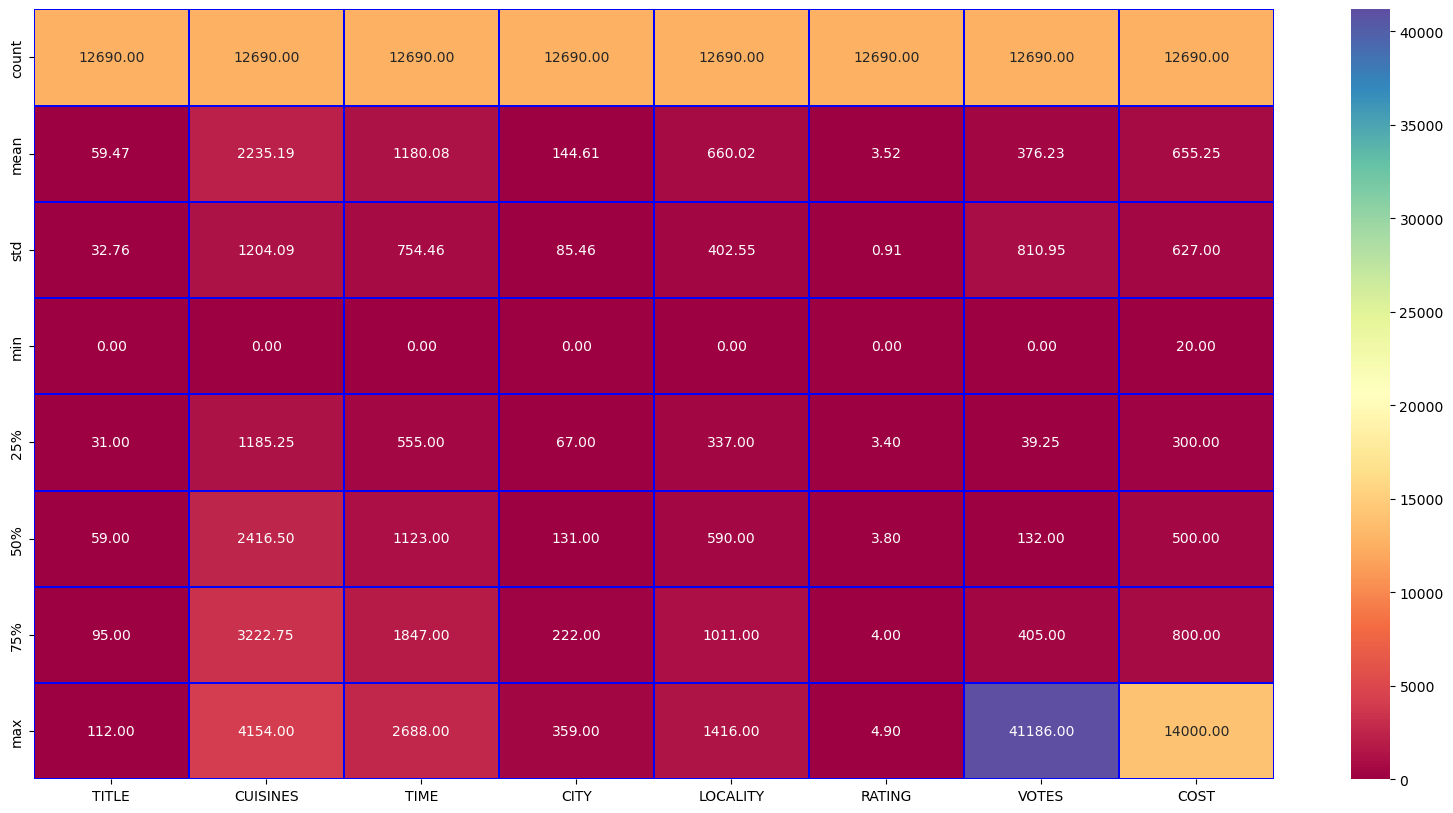

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.describe(),linewidth=0.3,annot=True,linecolor='blue',cmap='Spectral',fmt="0.2f")

DATA VISUALIZATION Various graphs are used to in order to understand how the data is distributed,it's skweness, scattered.

3.9    1238
1.0    1202
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
0.0       2
2.0       2
2.2       2
Name: RATING, dtype: int64


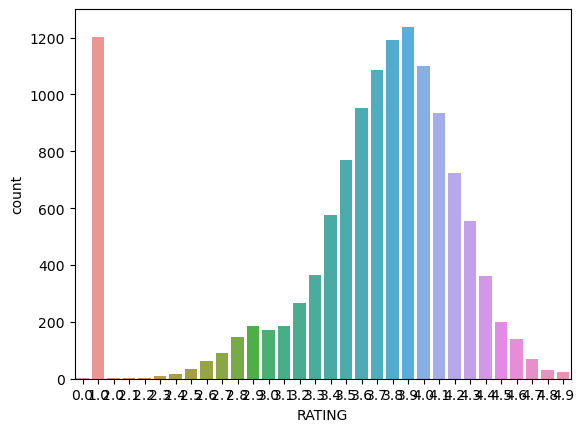

In [42]:
print(df1['RATING'].value_counts())
ax=sns.countplot(x='RATING',data=df1)

<Axes: xlabel='RATING', ylabel='Density'>

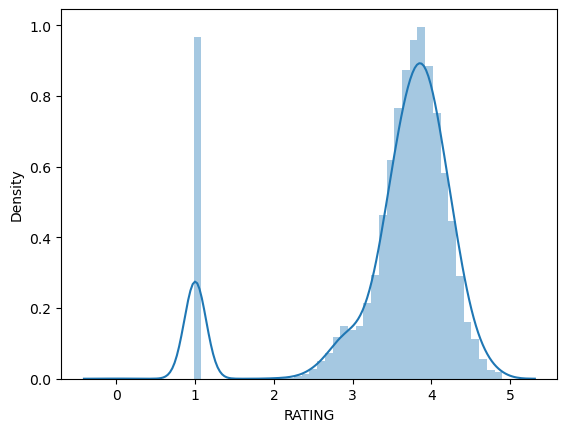

In [43]:
sns.distplot(df1['RATING'])

Text(0.5, 1.0, 'Rating Vs Cost')

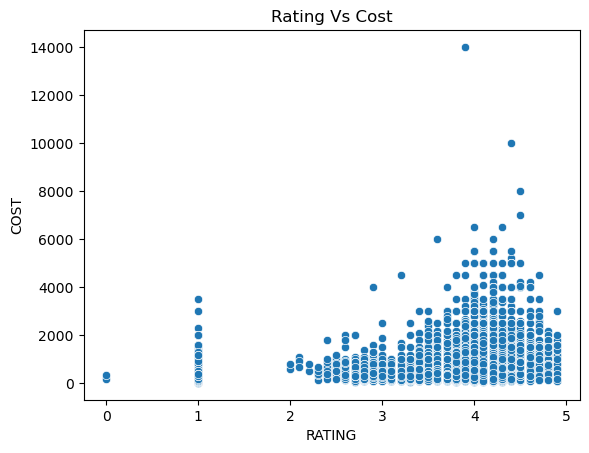

In [44]:
sns.scatterplot(x='RATING',y='COST',data=df1,palette='bright')
plt.title('Rating Vs Cost')

Text(0.5, 1.0, 'City Vs Cost')

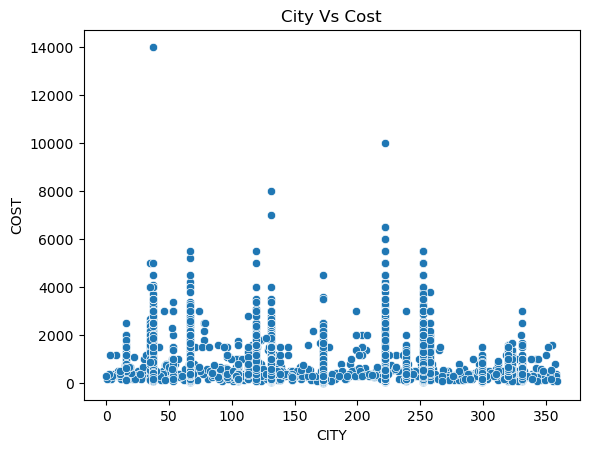

In [45]:
sns.scatterplot(x='CITY',y='COST',data=df1,palette='bright')
plt.title('City Vs Cost')

Text(0.5, 1.0, 'City Vs Cost')

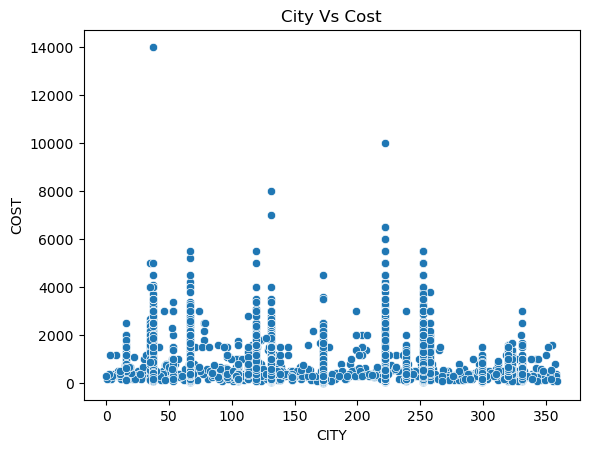

In [46]:
sns.scatterplot(x='CITY',y='COST',data=df1,palette='bright')
plt.title('City Vs Cost')

Text(0.5, 1.0, 'Time Vs Cost')

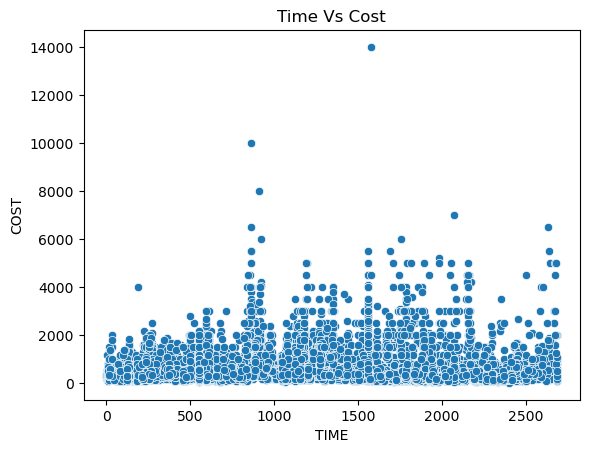

In [47]:
sns.scatterplot(x='TIME',y='COST',data=df1,palette='bright')
plt.title('Time Vs Cost')

Using regression plots to creates the relationship between two numerical variables using scatter points and a fitted regression line.If the points are widely scattered, it suggests a weaker relationship between the variables.

<Axes: xlabel='RATING', ylabel='COST'>

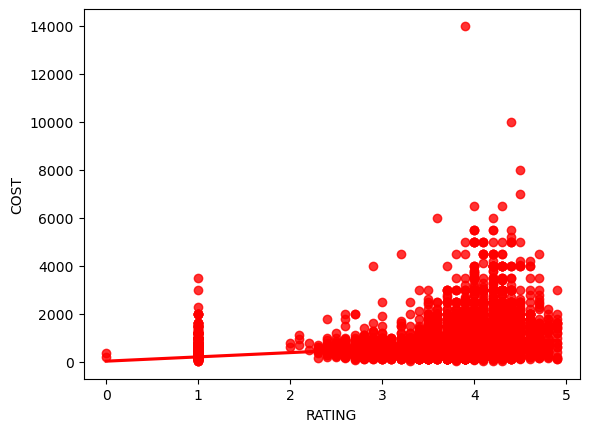

In [48]:
sns.regplot(data=df1, x="RATING", y="COST", color='r')

<Axes: xlabel='TITLE', ylabel='COST'>

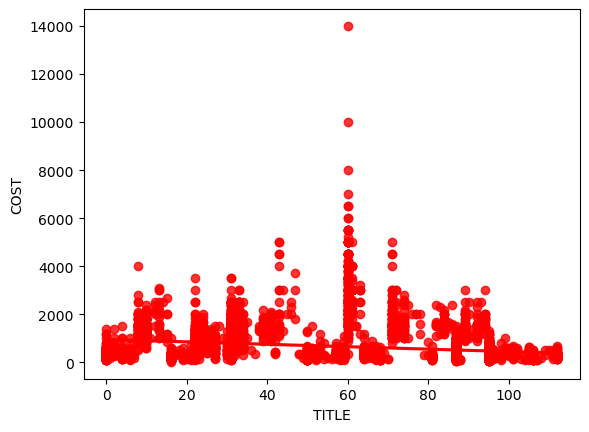

In [49]:
sns.regplot(data=df1, x="TITLE", y="COST", color='r')

<Axes: xlabel='CUISINES', ylabel='COST'>

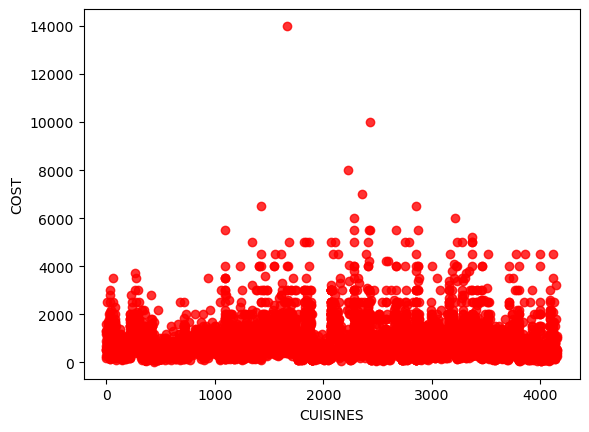

In [50]:
sns.regplot(data=df1, x="CUISINES", y="COST", color='r')

<Axes: xlabel='COST', ylabel='TIME'>

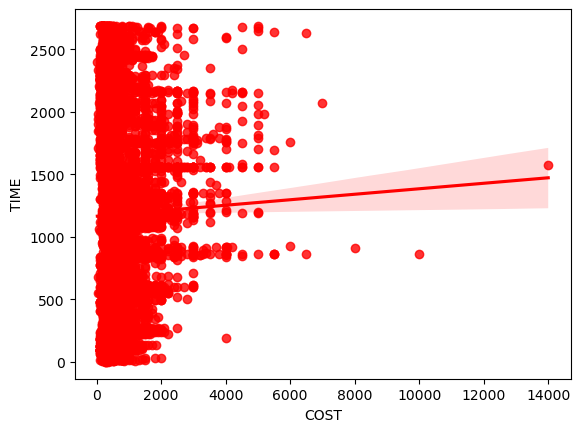

In [51]:
sns.regplot(data=df1, x="COST", y="TIME", color='r')

<Axes: xlabel='COST', ylabel='CITY'>

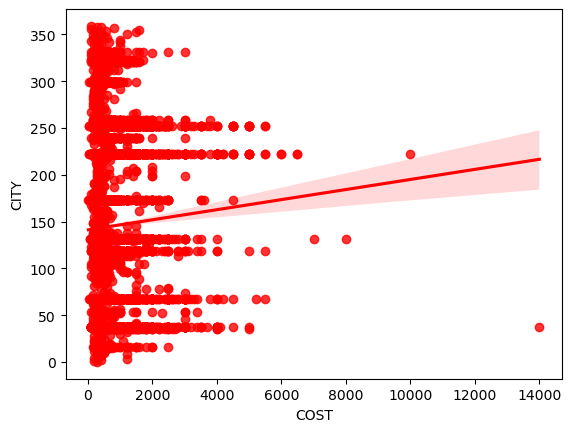

In [52]:
sns.regplot(data=df1, x="COST", y="CITY", color='r')

From the above plots it is observeed that outliers are present in few columns of the dataset.Inorder to remove thoes outliers zscore is imported and as the threshold value for zscore is between -3 to +3 keeping that in mind removing the outliers.

TITLE          Axes(0.125,0.53;0.133621x0.35)
CUISINES    Axes(0.285345,0.53;0.133621x0.35)
TIME         Axes(0.44569,0.53;0.133621x0.35)
CITY        Axes(0.606034,0.53;0.133621x0.35)
LOCALITY    Axes(0.766379,0.53;0.133621x0.35)
RATING         Axes(0.125,0.11;0.133621x0.35)
VOTES       Axes(0.285345,0.11;0.133621x0.35)
COST         Axes(0.44569,0.11;0.133621x0.35)
dtype: object

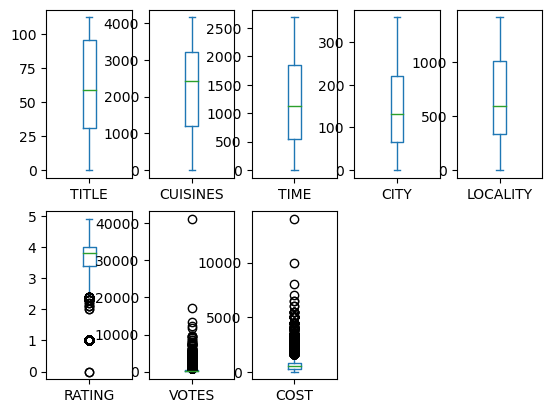

In [53]:
df1.plot(kind='box',subplots=True,layout=(2,5))

In [54]:
from scipy.stats import zscore
out_liers=df1[['RATING','VOTES']]
z=np.abs(zscore(out_liers))
z

,RATING,VOTES
0,0.086775,0.403533
1,0.745963,0.426964
2,0.306504,0.191427
3,0.636098,0.434363
4,0.306504,0.260485
...,...,...
12685,0.306504,0.209355
12686,0.855827,1.033116
12687,0.526233,0.285812
12688,0.023090,0.424497


In [70]:
df1.skew()                             #checking the skewness of data

TITLE      -0.069803
CUISINES   -0.218782
TIME        0.306186
CITY        0.271955
LOCALITY    0.327068
RATING     -1.876192
VOTES      -0.812447
COST        3.978801
dtype: float64

In [56]:
df1.skew().sort_values(ascending=False)

VOTES       14.522617
COST         3.978801
LOCALITY     0.327068
TIME         0.306186
CITY         0.271955
TITLE       -0.069803
CUISINES    -0.218782
RATING      -1.876192
dtype: float64

In [57]:
df1['VOTES'] = np.log(df1['VOTES'] + 1)

In [58]:
df1.skew()

TITLE      -0.069803
CUISINES   -0.218782
TIME        0.306186
CITY        0.271955
LOCALITY    0.327068
RATING     -1.876192
VOTES      -0.812447
COST        3.978801
dtype: float64

In [59]:
df1.corr()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.244866,0.053914,-0.002515,0.037355,-0.115896,-0.168340,-0.263581
CUISINES,0.244866,1.000000,0.104741,0.021184,0.015388,-0.024509,-0.013157,-0.014078
TIME,0.053914,0.104741,1.000000,-0.008705,-0.005850,-0.024496,-0.051263,0.018248
CITY,-0.002515,0.021184,-0.008705,1.000000,0.063150,-0.047190,0.019685,0.039519
LOCALITY,0.037355,0.015388,-0.005850,0.063150,1.000000,-0.022266,-0.035810,-0.018095
RATING,-0.115896,-0.024509,-0.024496,-0.047190,-0.022266,1.000000,0.831414,0.259014
VOTES,-0.168340,-0.013157,-0.051263,0.019685,-0.035810,0.831414,1.000000,0.325153
COST,-0.263581,-0.014078,0.018248,0.039519,-0.018095,0.259014,0.325153,1.000000


Title and cost have a weak to moderate negative correlation
Votes and cost have a weak to moderate positive correlation.
Rating and cost have a weak positive correlation 

In [60]:
X = df1.drop(['COST'], axis =1)
Y = df1['COST']

Making the data ready for applying various models but diving it into dependent and independent variable. Spliting it in Test and train.

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=.30,random_state=65)
print('Training size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training size: (8883, 7)
Training target size: (8883,)
Test size: (3807, 7)
Test target size: (3807,)


In [ ]:
Applying various Regressor Model on the dataset

In [62]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor(),
    "SV": SVR(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
}

In [63]:
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    model.score(X_test,Y_test)
    pred = model.predict(X_test)
    pred1= model.predict(X_train)
    print(f"{model_name}")
    print("Mean absolute Error",mean_absolute_error(Y_test,pred))
    print("Mean squared error",mean_squared_error(Y_test,pred))
    print("r2 Score on test data",r2_score(Y_test,pred)*100)  
    print("r2 Score on training data",r2_score(Y_train,pred1)*100)

Linear Regression
Mean absolute Error 342.26053778207864
Mean squared error 334531.9428599247
r2 Score on test data 15.721029071748681
r2 Score on training data 15.432401730128941
KNN
Mean absolute Error 343.1179406356711
Mean squared error 350370.9910375624
r2 Score on test data 11.730681634424156
r2 Score on training data 40.163712849012676
Ada Boost Regressor
Mean absolute Error 673.2437952411416
Mean squared error 609553.2718507247
r2 Score on test data -53.565372676648735
r2 Score on training data -51.07763278749313
SV
Mean absolute Error 349.31921211876687
Mean squared error 426504.8394563693
r2 Score on test data -7.449795849100438
r2 Score on training data -7.104585724157908
Random Forest Regressor
Mean absolute Error 188.92868206436765
Mean squared error 108404.80673415177
r2 Score on test data 72.68946732821921
r2 Score on training data 96.09704268751057
Extra Trees Regressor
Mean absolute Error 195.7863059276771
Mean squared error 109178.69890003794
r2 Score on test data 72.

All the models above shows Mean absolute Error,Mean squared error,r2 Score on test data and train data.From the above models the best suited for the dataset is Random Forest Regressor,Extra Trees Regressor  with r2 Score on test data 72% and r2 Score on training data 96% and 99%  but still will be further to do cross validation on all the models to select the best suited model the given dataset.

In [64]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, Y, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100:.2f}%")


Linear Regression CV mean accuracy: 15.60% ± 1.62%
KNN CV mean accuracy: 10.00% ± 2.39%
Ada Boost Regressor CV mean accuracy: -37.27% ± 28.58%
SV CV mean accuracy: -7.21% ± 1.14%
Random Forest Regressor CV mean accuracy: 71.98% ± 3.98%
Extra Trees Regressor CV mean accuracy: 70.93% ± 3.77%


In [65]:
rf= RandomForestRegressor()

In [66]:
parameters={ 
 "n_estimators":[100],  
 "max_depth":[8],       
 "min_samples_split":[5],  
 "min_samples_leaf":[2],   
"random_state":[42]
}

In [67]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [68]:
grid_GBC = GridSearchCV(RandomForestRegressor(), parameters,cv=2)
grid_GBC.fit(X_train, Y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8], 'min_samples_leaf': [2],
                         'min_samples_split': [5], 'n_estimators': [100],
                         'random_state': [42]})

In [73]:
filename="Resturant_Model.pkl"
pickle.dump(rf,open(filename,'wb'))
Final_Model=pickle.load(open(filename,'rb'))
result=Final_Model.score(X_test,Y_test)
print(result)

0.7330823409191916


In [74]:
conculusion=pd.DataFrame([Final_Model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"])
conculusion

,0,1,2,3,4,5,6,7,8,9,...,3797,3798,3799,3800,3801,3802,3803,3804,3805,3806
Predicted,938.5,1860.5,401.0,1267.0,205.0,1582.5,546.0,347.0,1048.0,259.0,...,444.5,459.5,397.0,1314.8,1360.5,794.5,228.5,325.5,1338.0,381.5
Original,900.0,1600.0,900.0,1600.0,150.0,2200.0,600.0,350.0,500.0,200.0,...,500.0,400.0,400.0,1200.0,1200.0,800.0,200.0,300.0,1200.0,400.0
